SETUP

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import re

def ImportToString (filepath):
    with open(filepath,'r') as file:
        line = file.read().replace('','')
    return line

def ImportToList (filepath):
    with open(filepath,'r') as file:
        line = file.read().replace('\n','')
        list = [item for item in line]
    return list

def ImportToListSpaces (filepath):
    with open(filepath,'r') as file:
        line = file.read().replace('\n','')
        list = [item for item in line]
    return list

def ImportToArrayInt(filepath):
    with open(filepath,'r') as file:
        lines = [list(map(int,line.strip())) for line in file.readlines()]
    return np.array(lines)

def ImportToArray(filepath):
    with open(filepath,'r') as file:
        lines = [list(line.strip()) for line in file.readlines()]
    return np.array(lines)

def ImportToListOfLists(filepath):
    with open(filepath,'r') as file:
        lines = [line for line in file.readlines()]
    return lines

PART ONE

In [ ]:
def ScoreGrid(indices, rows, columns):
    topleft, topright, bottomleft, bottomright = 0, 0, 0, 0
    for index in indices: #find top left
        if index[1]<(rows-1)/2 and index[0]<(columns-1)/2:
            topleft+=1

    for index in indices: #find bottom left
        if index[1]>=(rows+1)/2 and index[0]<(columns-1)/2:
            bottomleft+=1

    for index in indices: #find bottom right
        if index[1]>=(rows+1)/2 and index[0]>=(columns+1)/2:
            bottomright+=1

    for index in indices: #find bottom left
        if index[1]<(rows-1)/2 and index[0]>=(columns+1)/2:
            topright+=1

    score = topleft*topright*bottomleft*bottomright
    print(topleft, topright, bottomleft, bottomright)
    return score

def PrintIndices(indices, rows, columns):
    Grid = np.full((rows,columns), '.')
    for index in indices:
        if Grid[index[1], index[0]]=='.':
            Grid[index[1], index[0]] = int(1)
        else:
            Grid[index[1], index[0]] = int(Grid[index[1], index[0]]) + int(1)
    print(Grid)


seconds = 100
rows, columns=103, 101
#rows, columns = 7, 11
#importtext = ImportToString('Day14Test.txt')
importtext = ImportToString('Day14Input.txt')

pattern = re.compile(r'p=(\d+),(\d+) v=(-?\d+),(-?\d+)')
matches = pattern.findall(importtext)

indices = [list(map(int, item)) for item in matches]
NewIndices =[]
for index in indices:
    p_x, p_y, dx, dy = index
    NewIndices.append([(p_x + dx*seconds) % columns, (p_y +dy*seconds) % rows])

PrintIndices(NewIndices, rows, columns)

ScoreGrid(NewIndices, rows,columns)


PART TWO

In [41]:
def PlotArray(array, ind):

    # Function to create a color map for the array
    def color_map(value):
        if value.isdigit() or (value.startswith('-') and value[1:].isdigit()):
            return 'red'
        return 'white'

    i, j = ind%5, int(ind/5)
    # Create the colored grid
    colored_grid = np.array([[color_map(cell) for cell in row] for row in array])

    # Create the plot

    ax[i,j].imshow(colored_grid == 'red', cmap='Reds')
    ax[i,j].imshow(colored_grid == 'white', cmap='Greys')

    # Hide the axes
    ax[i,j].axis('off')


def PrintIndices(indices, rows, columns):
    Grid = np.full((rows,columns), '.')
    for index in indices:
        if Grid[index[1], index[0]]=='.':
            Grid[index[1], index[0]] = int(1)
        else:
            Grid[index[1], index[0]] = int(Grid[index[1], index[0]]) + int(1)
    #print(Grid)
    return Grid


seconds = 68+64*101
rows, columns=103, 101
importtext = ImportToString('Day14Input.txt')
#rows, columns = 7, 11
#importtext = ImportToString('Day14Test.txt')

pattern = re.compile(r'p=(\d+),(\d+) v=(-?\d+),(-?\d+)')
matches = pattern.findall(importtext)
indices = [list(map(int, item)) for item in matches]
#StDevs = np.zeros((100*25,3))



for this_set in range (0, 2):
    fig, ax = plt.subplots(5, 5, figsize=(20, 20))

    for ind in range (0, 25):
        NewIndices =[]
        #X_Items = []
        for index in indices:
            p_x, p_y, dx, dy = index
            NewIndices.append([(p_x +seconds*dx ) % columns, (p_y +seconds*dy) % rows, dx, dy])
            #X_Items = [item[0] for item in NewIndices]
            #Y_Items = [item[1] for item in NewIndices]
            #StDevs[this_set*25 + ind,1]=np.std(X_Items)
            #StDevs[this_set*25 + ind,2]=np.std(Y_Items)    
        seconds +=101

        PlotArray(PrintIndices(NewIndices, rows, columns), ind)
        
    print(seconds)

    fig.tight_layout()
    #plt.show()
    fig.savefig('Graphs' + str(this_set) + '.png')
    plt.clf()

#print(StDevs)



9057
11582


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

6532


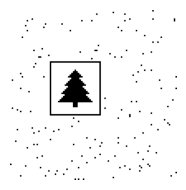

In [43]:
def PlotArray(array, ind):

    # Function to create a color map for the array
    def color_map(value):
        if value.isdigit():
            return 'black'
        return 'white'

    colored_grid = np.array([[color_map(cell) for cell in row] for row in array])
    ax.imshow(colored_grid == 'black', cmap='Greys')
    ax.axis('off')


def PrintIndices(indices, rows, columns):
    Grid = np.full((rows,columns), '.')
    for index in indices:
        if Grid[index[1], index[0]]=='.':
            Grid[index[1], index[0]] = int(1)
        else:
            Grid[index[1], index[0]] = int(Grid[index[1], index[0]]) + int(1)
    #print(Grid)
    return Grid



seconds = 68 +101*64
rows, columns=103, 101
importtext = ImportToString('Day14Input.txt')
#rows, columns = 7, 11
#importtext = ImportToString('Day14Test.txt')

pattern = re.compile(r'p=(\d+),(\d+) v=(-?\d+),(-?\d+)')
matches = pattern.findall(importtext)
indices = [list(map(int, item)) for item in matches]


fig, ax = plt.subplots(figsize=(2, 2))
NewIndices =[]
for index in indices:
    p_x, p_y, dx, dy = index
    NewIndices.append([(p_x +dx*seconds ) % columns, (p_y +dy*seconds) % rows, dx, dy])


PlotArray(PrintIndices(NewIndices, rows, columns), 100)        
print(seconds)

fig.tight_layout()
plt.show()
#fig.savefig('Graphs' + str(this_set) + '.png')

